# 导师制名企实训班商业智能方向 004期 Lesson 14

### Action 2 :资金流入流出预测
https://tianchi.aliyun.com/competition/entrance/231573/information  
数据集一共包括4张表：用户基本信息数据、用户申购赎回数据、收益率表和银行间拆借利率表  
2.8万用户，284万行为数据，294天拆解利率，427天收益率  
2013-07-01到2014-08-31，预测2014年9月的申购和赎回  

In [1]:
# 引包
import pandas as pd

In [2]:
# 数据加载
data = pd.read_csv('data/user_balance_table.csv', parse_dates=['report_date'])
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [3]:
total_balance = data.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [4]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
# 对指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分： trend(趋势)， seasonal(季节)，residual(残差)
    result = sm.tsa.seasonal_decompose(data, period=30)
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')

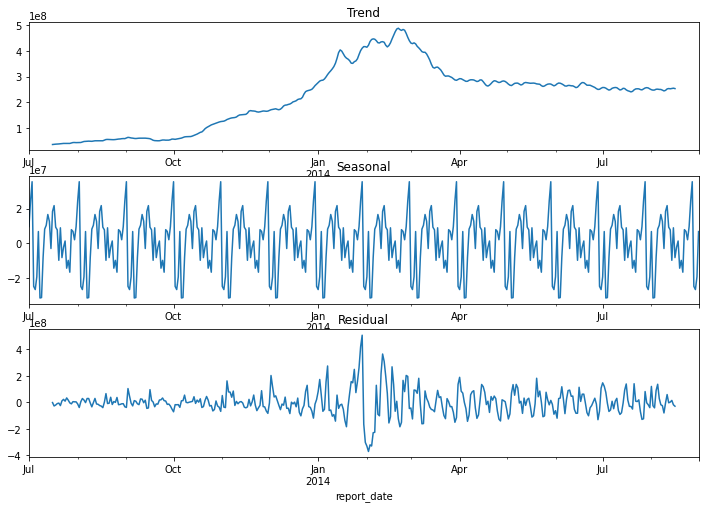

In [7]:
plot_stl(purchase.total_purchase_amt)

### 使用Prophet模型

In [8]:
purchase_pro = purchase.copy()
redeem_pro = redeem.copy()

In [9]:
purchase_pro['ds'] = purchase_pro.index
purchase_pro.rename(columns={'total_purchase_amt': 'y'}, inplace=True)
purchase_pro

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [10]:
redeem_pro['ds'] = redeem_pro.index
redeem_pro.rename(columns={'total_redeem_amt': 'y'}, inplace=True)
redeem_pro

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05
...,...,...
2014-08-27,468164147,2014-08-27
2014-08-28,297893861,2014-08-28
2014-08-29,273756380,2014-08-29


In [11]:
purchase_pro = purchase_pro.reset_index(drop=True)
redeem_pro = redeem_pro.reset_index(drop=True)
purchase_pro

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05
...,...,...
422,302194801,2014-08-27
423,245082751,2014-08-28
424,267554713,2014-08-29
425,199708772,2014-08-30


In [12]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [13]:
# 拟合Prophet模型
model = Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1)
model.fit(purchase_pro)
# 预测为未来1个月， 9月份30天
future = model.make_future_dataframe(periods = 30)
purchase_pro_pred = model.predict(future)
purchase_pro_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.416301e+07,-9.342371e+07,1.500689e+08,-1.416301e+07,-1.416301e+07,4.492514e+07,4.492514e+07,4.492514e+07,4.492514e+07,4.492514e+07,4.492514e+07,0.0,0.0,0.0,3.076213e+07
1,2013-07-02,-1.301188e+07,-8.449419e+07,1.518430e+08,-1.301188e+07,-1.301188e+07,4.766240e+07,4.766240e+07,4.766240e+07,4.766240e+07,4.766240e+07,4.766240e+07,0.0,0.0,0.0,3.465052e+07
2,2013-07-03,-1.186075e+07,-9.289229e+07,1.402532e+08,-1.186075e+07,-1.186075e+07,3.775262e+07,3.775262e+07,3.775262e+07,3.775262e+07,3.775262e+07,3.775262e+07,0.0,0.0,0.0,2.589187e+07
3,2013-07-04,-1.070963e+07,-9.545760e+07,1.297349e+08,-1.070963e+07,-1.070963e+07,1.954415e+07,1.954415e+07,1.954415e+07,1.954415e+07,1.954415e+07,1.954415e+07,0.0,0.0,0.0,8.834519e+06
4,2013-07-05,-9.558499e+06,-1.394056e+08,9.429022e+07,-9.558499e+06,-9.558499e+06,-1.790362e+07,-1.790362e+07,-1.790362e+07,-1.790362e+07,-1.790362e+07,-1.790362e+07,0.0,0.0,0.0,-2.746212e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.015875e+08,6.041248e+07,2.947141e+08,1.975824e+08,2.056620e+08,-1.790362e+07,-1.790362e+07,-1.790362e+07,-1.790362e+07,-1.790362e+07,-1.790362e+07,0.0,0.0,0.0,1.836839e+08
453,2014-09-27,2.008516e+08,6.079789e+06,2.431518e+08,1.965422e+08,2.051988e+08,-6.963146e+07,-6.963146e+07,-6.963146e+07,-6.963146e+07,-6.963146e+07,-6.963146e+07,0.0,0.0,0.0,1.312201e+08
454,2014-09-28,2.001157e+08,2.330024e+07,2.551558e+08,1.955405e+08,2.048070e+08,-6.234922e+07,-6.234922e+07,-6.234922e+07,-6.234922e+07,-6.234922e+07,-6.234922e+07,0.0,0.0,0.0,1.377664e+08
455,2014-09-29,1.993797e+08,1.199105e+08,3.535204e+08,1.945042e+08,2.043760e+08,4.492514e+07,4.492514e+07,4.492514e+07,4.492514e+07,4.492514e+07,4.492514e+07,0.0,0.0,0.0,2.443049e+08


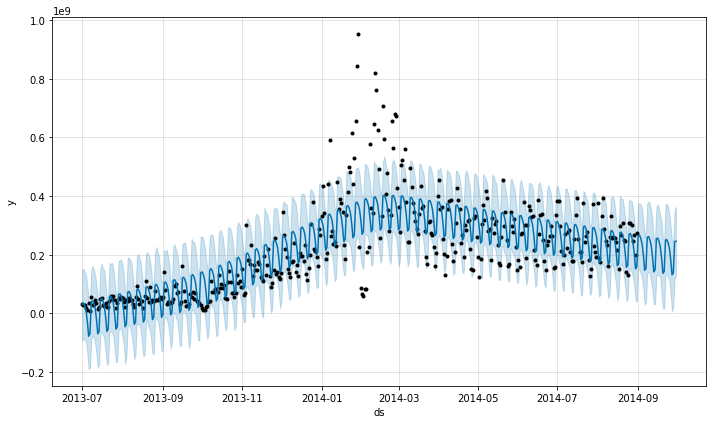

In [14]:
_ = model.plot(purchase_pro_pred)

In [15]:
# 拟合Prophet模型
model2 = Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1)
model2.fit(redeem_pro)
# 预测为未来1个月， 9月份30天
future = model2.make_future_dataframe(periods = 30)
redeem_pro_pred = model2.predict(future)
redeem_pro_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-2.502464e+07,-6.450508e+07,1.068765e+08,-2.502464e+07,-2.502464e+07,4.902237e+07,4.902237e+07,4.902237e+07,4.902237e+07,4.902237e+07,4.902237e+07,0.0,0.0,0.0,2.399774e+07
1,2013-07-02,-2.413817e+07,-8.998545e+07,8.268184e+07,-2.413817e+07,-2.413817e+07,2.277842e+07,2.277842e+07,2.277842e+07,2.277842e+07,2.277842e+07,2.277842e+07,0.0,0.0,0.0,-1.359749e+06
2,2013-07-03,-2.325171e+07,-7.958294e+07,8.831170e+07,-2.325171e+07,-2.325171e+07,2.490078e+07,2.490078e+07,2.490078e+07,2.490078e+07,2.490078e+07,2.490078e+07,0.0,0.0,0.0,1.649073e+06
3,2013-07-04,-2.236524e+07,-9.695541e+07,6.925795e+07,-2.236524e+07,-2.236524e+07,6.126451e+06,6.126451e+06,6.126451e+06,6.126451e+06,6.126451e+06,6.126451e+06,0.0,0.0,0.0,-1.623879e+07
4,2013-07-05,-2.147878e+07,-1.098610e+08,6.220219e+07,-2.147878e+07,-2.147878e+07,-4.532961e+06,-4.532961e+06,-4.532961e+06,-4.532961e+06,-4.532961e+06,-4.532961e+06,0.0,0.0,0.0,-2.601174e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.930787e+08,1.983508e+08,3.703341e+08,2.912747e+08,2.945366e+08,-4.532961e+06,-4.532961e+06,-4.532961e+06,-4.532961e+06,-4.532961e+06,-4.532961e+06,0.0,0.0,0.0,2.885457e+08
453,2014-09-27,2.932596e+08,1.488340e+08,3.219541e+08,2.913542e+08,2.948042e+08,-5.849221e+07,-5.849221e+07,-5.849221e+07,-5.849221e+07,-5.849221e+07,-5.849221e+07,0.0,0.0,0.0,2.347674e+08
454,2014-09-28,2.934406e+08,1.635958e+08,3.369441e+08,2.914253e+08,2.950713e+08,-3.980285e+07,-3.980285e+07,-3.980285e+07,-3.980285e+07,-3.980285e+07,-3.980285e+07,0.0,0.0,0.0,2.536377e+08
455,2014-09-29,2.936215e+08,2.564997e+08,4.284970e+08,2.914813e+08,2.953503e+08,4.902237e+07,4.902237e+07,4.902237e+07,4.902237e+07,4.902237e+07,4.902237e+07,0.0,0.0,0.0,3.426439e+08


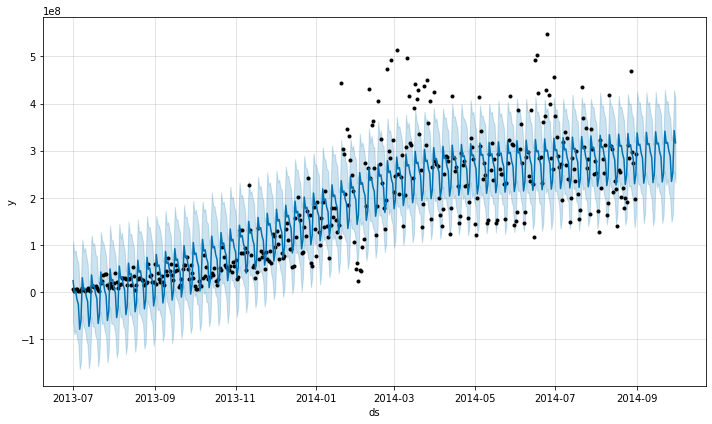

In [16]:
_ = model2.plot(redeem_pro_pred)

In [17]:
purchase_pro2 = purchase_pro_pred[(purchase_pro_pred['ds'] >= '2014-09-01') & (purchase_pro_pred['ds'] <= '2014-09-30')][['ds', 'yhat']]
purchase_pro2

,ds,yhat
427,2014-09-01,2.649107e+08
428,2014-09-02,2.669121e+08
429,2014-09-03,2.562664e+08
430,2014-09-04,2.373220e+08
431,2014-09-05,1.991383e+08
432,2014-09-06,1.466745e+08
433,2014-09-07,1.532208e+08
434,2014-09-08,2.597593e+08
435,2014-09-09,2.617606e+08
436,2014-09-10,2.511149e+08


In [18]:
redeem_pro2 = redeem_pro_pred[(redeem_pro_pred['ds'] >= '2014-09-01') & (redeem_pro_pred['ds'] <= '2014-09-30')][['ds', 'yhat']]
redeem_pro2

,ds,yhat
427,2014-09-01,3.375771e+08
428,2014-09-02,3.115141e+08
429,2014-09-03,3.138175e+08
430,2014-09-04,2.952241e+08
431,2014-09-05,2.847456e+08
432,2014-09-06,2.309673e+08
433,2014-09-07,2.498376e+08
434,2014-09-08,3.388438e+08
435,2014-09-09,3.127808e+08
436,2014-09-10,3.150841e+08


In [19]:
# 合并结果
result = pd.DataFrame()
result['ds'] = purchase_pro2.ds
result['purchase_amt'] = purchase_pro2.yhat
result['redeem_amt'] = redeem_pro2.yhat
result['ds'] = result['ds'].apply(lambda x:str(x).replace('-','')[0:8])
result

,ds,purchase_amt,redeem_amt
427,20140901,2.649107e+08,3.375771e+08
428,20140902,2.669121e+08,3.115141e+08
429,20140903,2.562664e+08,3.138175e+08
430,20140904,2.373220e+08,2.952241e+08
431,20140905,1.991383e+08,2.847456e+08
432,20140906,1.466745e+08,2.309673e+08
433,20140907,1.532208e+08,2.498376e+08
434,20140908,2.597593e+08,3.388438e+08
435,20140909,2.617606e+08,3.127808e+08
436,20140910,2.511149e+08,3.150841e+08


In [20]:
# 保存结果
result.to_csv('prophet_pro.csv', header=None, index=False)

### 使用ARIMA模型

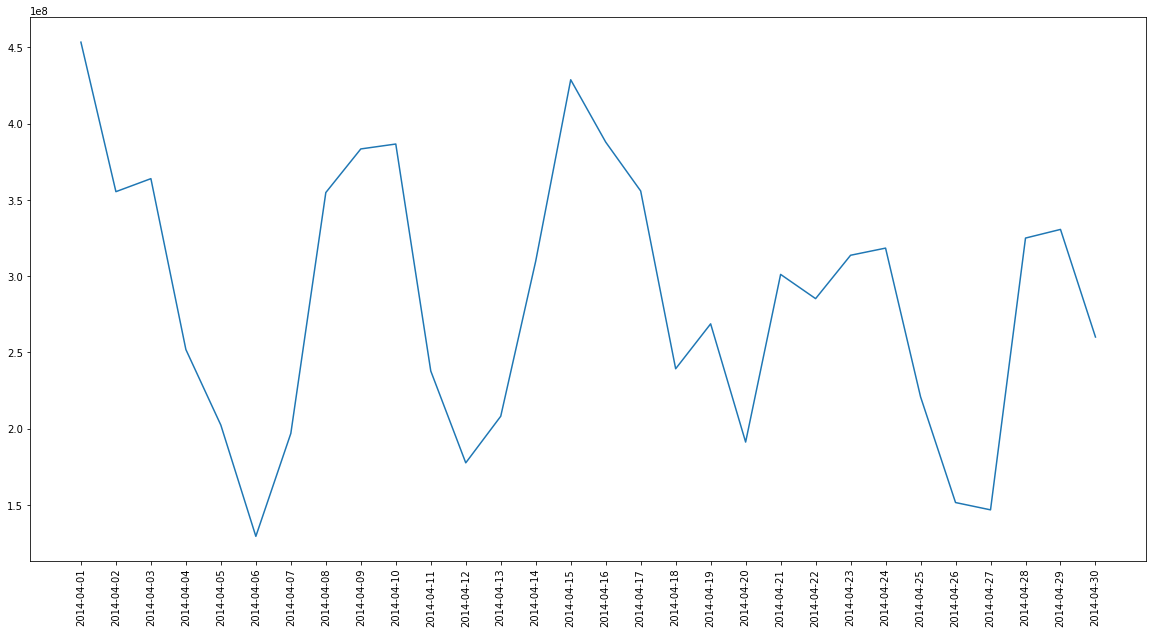

In [21]:
purchase2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-04-30')]
# 画出走势图
plt.figure(figsize=(20, 10))
plt.plot(purchase2.total_purchase_amt)
date_range = pd.date_range('2014-04-01', '2014-04-30')
_ = plt.xticks(date_range, rotation=90)

In [22]:
# 查看序列平稳性
from statsmodels.tsa.stattools import adfuller
t = adfuller(purchase['total_purchase_amt'])
t

(-1.5898802926313507,
 0.4886749751375928,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

如何确定该序列能否平稳：  
主要看1%、%5、%10不同程度拒绝原假设的统计值和ADF Test result的比较，如果ADF Test result同时小于1%、5%、10%即说明非常好地拒绝原假设（原假设是不稳定的，因此证明是平稳的）  
这里，adf结果为-1.58988， 大于三个level的统计值，无法拒绝原假设（原假设是不平稳的），需要进行一阶差分后，再进行检验  

In [23]:
# 不能拒绝原假设（不平稳）
# 进行一阶差分
diff1 = purchase.diff(1)[1:]
t = adfuller(diff1)
t

(-7.947102224652343,
 3.198186862488185e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [24]:
t = adfuller(redeem['total_redeem_amt'])
t

(-1.372413679828339,
 0.5954275877949474,
 13,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15816.780952766481)

In [25]:
# 不能拒绝原假设（不平稳）
# 进行一阶差分
diff1 = redeem.diff(1)[1:]
t = adfuller(diff1)
t

(-11.69198690696884,
 1.6443717458497645e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
# p, d, q 其中d = 1
model = ARIMA(purchase, order=(7,1,5)).fit()
# 使用typ='levels'对原始数据维度上进行预测，相当于进行了反差分
purchase_pred = model.predict('2014-09-01', '2014-09-30', typ='levels')
purchase_pred

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provi

2014-09-01    3.310530e+08
2014-09-02    3.318779e+08
2014-09-03    3.338929e+08
2014-09-04    2.983217e+08
2014-09-05    2.407528e+08
2014-09-06    2.266136e+08
2014-09-07    2.435553e+08
2014-09-08    2.970857e+08
2014-09-09    3.321284e+08
2014-09-10    3.265220e+08
2014-09-11    2.916860e+08
2014-09-12    2.392719e+08
2014-09-13    2.253542e+08
2014-09-14    2.475278e+08
2014-09-15    2.950929e+08
2014-09-16    3.345015e+08
2014-09-17    3.280844e+08
2014-09-18    2.927119e+08
2014-09-19    2.448981e+08
2014-09-20    2.275704e+08
2014-09-21    2.530212e+08
2014-09-22    2.980712e+08
2014-09-23    3.366752e+08
2014-09-24    3.321974e+08
2014-09-25    2.947130e+08
2014-09-26    2.505394e+08
2014-09-27    2.318262e+08
2014-09-28    2.574450e+08
2014-09-29    3.025693e+08
2014-09-30    3.387026e+08
Freq: D, dtype: float64

In [28]:
model.aic

16669.64603394785

In [29]:
# p, d, q 其中d = 1
model2 = ARIMA(redeem, order=(7,1,5)).fit()
# 使用typ='levels'对原始数据维度上进行预测，相当于进行了反差分
redeem_pred = model2.predict('2014-09-01', '2014-09-30', typ='levels')
redeem_pred

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params)

2014-09-01    3.169056e+08
2014-09-02    3.372411e+08
2014-09-03    3.632381e+08
2014-09-04    3.074618e+08
2014-09-05    2.627960e+08
2014-09-06    2.258625e+08
2014-09-07    2.592077e+08
2014-09-08    3.115394e+08
2014-09-09    3.477356e+08
2014-09-10    3.562332e+08
2014-09-11    3.092614e+08
2014-09-12    2.598394e+08
2014-09-13    2.339009e+08
2014-09-14    2.578093e+08
2014-09-15    3.125407e+08
2014-09-16    3.537151e+08
2014-09-17    3.573517e+08
2014-09-18    3.146065e+08
2014-09-19    2.626470e+08
2014-09-20    2.387330e+08
2014-09-21    2.616077e+08
2014-09-22    3.157079e+08
2014-09-23    3.588029e+08
2014-09-24    3.611431e+08
2014-09-25    3.197813e+08
2014-09-26    2.671908e+08
2014-09-27    2.432726e+08
2014-09-28    2.661074e+08
2014-09-29    3.197029e+08
2014-09-30    3.635398e+08
Freq: D, dtype: float64

In [30]:
model2.aic

16523.629167582716

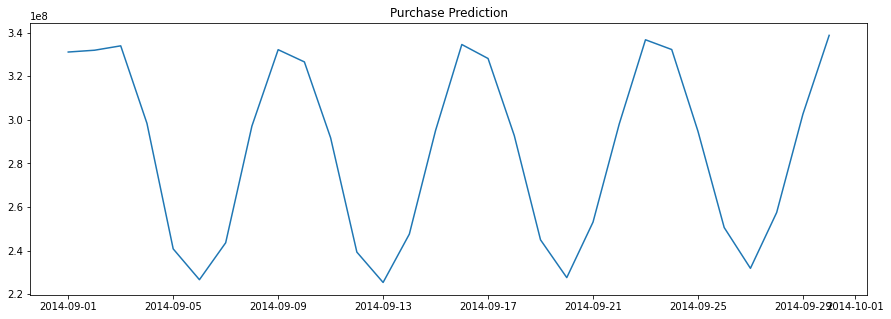

In [31]:
plt.figure(figsize=(15,5))
plt.title('Purchase Prediction')
plt.plot(purchase_pred)
plt.show()

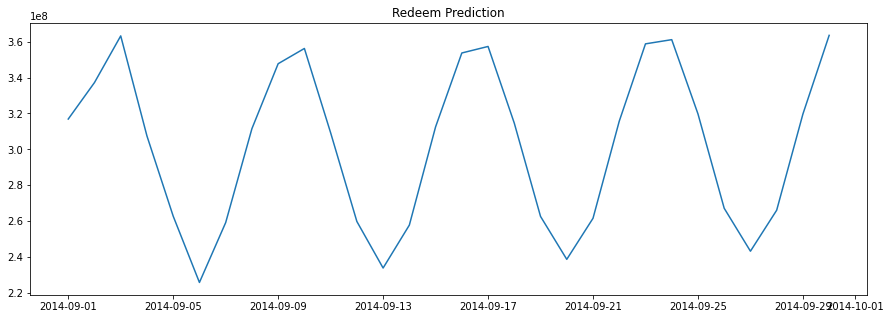

In [32]:
plt.figure(figsize=(15,5))
plt.title('Redeem Prediction')
plt.plot(redeem_pred)
plt.show()

In [33]:
result = pd.DataFrame()
result['date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result['date'] = result['date'].apply(lambda x:str(x).replace('-','')[0:8])
result

,date,purchase,redeem
0,20140901,3.310530e+08,3.169056e+08
1,20140902,3.318779e+08,3.372411e+08
2,20140903,3.338929e+08,3.632381e+08
3,20140904,2.983217e+08,3.074618e+08
4,20140905,2.407528e+08,2.627960e+08
5,20140906,2.266136e+08,2.258625e+08
6,20140907,2.435553e+08,2.592077e+08
7,20140908,2.970857e+08,3.115394e+08
8,20140909,3.321284e+08,3.477356e+08
9,20140910,3.265220e+08,3.562332e+08


In [34]:
# 保存结果
result.to_csv('prophet_arima.csv', header=None, index=False)

### 基于规则的方法

In [35]:
# 给数据添加时间维度
def add_timestamp(data):
    # 时间格式转换
    data['report_date'] = pd.to_datetime(data['report_date'], format='%Y%m%d')
    # 添加时间维度
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['year'] = data['report_date'].dt.year
    data['week'] = data['report_date'].dt.week
    data['weekday'] = data['report_date'].dt.weekday
    return data

In [36]:
data1 = add_timestamp(data)
data1

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,share_amt,category1,category2,category3,category4,day,month,year,week,weekday
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,5,8,2014,32,1
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,8,8,2014,32,4
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,11,8,2014,33,0
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,14,8,2014,33,3
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,17,8,2014,33,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,...,61,NaN,NaN,NaN,NaN,25,8,2014,35,0
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,...,60,0.0,0.0,0.0,12500.0,31,8,2014,35,6
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,...,2297,NaN,NaN,NaN,NaN,24,7,2014,30,3
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,...,2298,NaN,NaN,NaN,NaN,27,7,2014,30,6


In [37]:
# 0代表周一，6代表周日
data['weekday'].value_counts()

6    410701
5    408824
4    407509
3    405907
2    404159
1    402536
0    400785
Name: weekday, dtype: int64

In [38]:
def get_total_balance(data, begin):
    # 在copy数据上进行操作
    df_temp = data.copy()
    # 按照date进行聚合
    df_temp = df_temp.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
    # 还原date字段，重新索引
    df_temp.reset_index(inplace=True)
    df_temp = df_temp[df_temp['report_date'] >= begin]
    return df_temp

In [39]:
# 筛选从2014-04-01之后的数据 作为平稳数据
total_balance = get_total_balance(data, '2014-03-01')
total_balance

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580,211279011
244,2014-03-02,276202230,246199417
245,2014-03-03,505305862,513017360
246,2014-03-04,524146340,250562978
247,2014-03-05,454295491,209072753
...,...,...,...
422,2014-08-27,302194801,468164147
423,2014-08-28,245082751,297893861
424,2014-08-29,267554713,273756380
425,2014-08-30,199708772,196374134


In [40]:
import datetime
import numpy as np
# 生成测试数据
def generate_test_data(data):
    # 在copy数据上进行操作
    total_balance = data.copy()
    # 生成2014-09-01到2014-09-30的数据
    start = datetime.datetime(2014, 9, 1)
    end = datetime.datetime(2014, 10, 1)
    test_data = []
    while start != end:
        # 添加3个字段，date， total_purchase_amt, total_redeem_amt
        temp = [start, np.nan, np.nan]
        test_data.append(temp)
        # 日期 + 1
        start += datetime.timedelta(days=1)        
    # 封装test_data
    test_data = pd.DataFrame(test_data)
    test_data.columns = total_balance.columns
    # 将test_data合并到total_balance中
    total_balance = pd.concat([total_balance, test_data], axis=0)
    return total_balance

In [41]:
total_balance = generate_test_data(total_balance)
total_balance

,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580.0,211279011.0
244,2014-03-02,276202230.0,246199417.0
245,2014-03-03,505305862.0,513017360.0
246,2014-03-04,524146340.0,250562978.0
247,2014-03-05,454295491.0,209072753.0
...,...,...,...
25,2014-09-26,NaN,NaN
26,2014-09-27,NaN,NaN
27,2014-09-28,NaN,NaN
28,2014-09-29,NaN,NaN


In [42]:
# 对total_balance添加时间维度
total_balance = add_timestamp(total_balance)
total_balance

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
243,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
244,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
245,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
246,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
247,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2
...,...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,26,9,2014,39,4
26,2014-09-27,NaN,NaN,27,9,2014,39,5
27,2014-09-28,NaN,NaN,28,9,2014,39,6
28,2014-09-29,NaN,NaN,29,9,2014,40,0


In [43]:
backup = total_balance.copy()

In [44]:
total_balance = backup.copy()

In [45]:
weekday_weight = total_balance[['weekday', 'total_purchase_amt', 'total_redeem_amt']].groupby('weekday', as_index=False).mean()
weekday_weight = weekday_weight.rename(columns={'total_purchase_amt': 'purchase_weekday',
                                               'total_redeem_amt': 'redeem_weekday'})
weekday_weight

,weekday,purchase_weekday,redeem_weekday
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


In [46]:
weekday_weight['purchase_weekday'] /= np.mean(total_balance['total_purchase_amt'])
weekday_weight['redeem_weekday'] /= np.mean(total_balance['total_redeem_amt'])
weekday_weight

,weekday,purchase_weekday,redeem_weekday
0,0,1.185411,1.257964
1,1,1.209608,1.172248
2,2,1.163752,1.157944
3,3,1.139503,1.026762
4,4,0.902682,0.975445
5,5,0.709237,0.669791
6,6,0.712065,0.761712


In [47]:
total_balance = pd.merge(total_balance, weekday_weight, on='weekday', how='left')
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,purchase_weekday,redeem_weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5,0.709237,0.669791
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6,0.712065,0.761712
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0,1.185411,1.257964
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1,1.209608,1.172248
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2,1.163752,1.157944
...,...,...,...,...,...,...,...,...,...,...
209,2014-09-26,NaN,NaN,26,9,2014,39,4,0.902682,0.975445
210,2014-09-27,NaN,NaN,27,9,2014,39,5,0.709237,0.669791
211,2014-09-28,NaN,NaN,28,9,2014,39,6,0.712065,0.761712
212,2014-09-29,NaN,NaN,29,9,2014,40,0,1.185411,1.257964


In [48]:
# 计算日期因子
# 统计周一到周日，在1-31号中出现的频次['weekday', 'day']出现的频次
weekday_count = total_balance[['report_date', 'day', 'weekday']].groupby(['day', 'weekday'], as_index=False).count()
weekday_count = pd.merge(weekday_count, weekday_weight, on='weekday')
weekday_count

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,1.185411,1.257964
1,2,0,1,1.185411,1.257964
2,3,0,1,1.185411,1.257964
3,4,0,1,1.185411,1.257964
4,5,0,1,1.185411,1.257964
...,...,...,...,...,...
179,25,2,1,1.163752,1.157944
180,26,2,1,1.163752,1.157944
181,27,2,1,1.163752,1.157944
182,28,2,1,1.163752,1.157944


In [49]:
# 日期计算 = 周期因子 * （周一到周日在1-31日中出现的频次）/一共有几个月
weekday_count['purchase_weekday'] = weekday_count['purchase_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count['redeem_weekday'] = weekday_count['redeem_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))

In [50]:
# 得到日期因子
day_rate = weekday_count.drop(['weekday', 'report_date'], axis=1).groupby('day', as_index=False).sum()
day_rate

,day,purchase_weekday,redeem_weekday
0,1,1.009731,1.005167
1,2,1.006644,1.021864
2,3,1.037011,1.010455
3,4,1.030815,1.046789
4,5,1.002776,0.989992
5,6,0.935559,0.932230
6,7,0.999723,1.015369
7,8,1.009731,1.005167
8,9,1.006644,1.021864
9,10,1.037011,1.010455


In [51]:
# 按照日期day，计算均值，即1号的均值，2号的均值。。。
day_mean = total_balance[['day', 'total_purchase_amt', 'total_redeem_amt']].groupby('day', as_index=False).mean()
day_mean

,day,total_purchase_amt,total_redeem_amt
0,1,3.253391e+08,2.347676e+08
1,2,2.481255e+08,2.186074e+08
2,3,2.994808e+08,2.968247e+08
3,4,3.159802e+08,2.925598e+08
4,5,3.286272e+08,2.552484e+08
5,6,2.998453e+08,2.460958e+08
6,7,2.836725e+08,2.374837e+08
7,8,2.918664e+08,2.475255e+08
8,9,2.856603e+08,2.440269e+08
9,10,3.446347e+08,2.593854e+08


In [52]:
day_pred = pd.merge(day_mean, day_rate, on='day', how='left')
day_pred['total_purchase_amt'] /= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] /= day_pred['redeem_weekday']
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992
5,6,3.204986e+08,2.639860e+08,0.935559,0.932230
6,7,2.837511e+08,2.338892e+08,0.999723,1.015369
7,8,2.890537e+08,2.462531e+08,1.009731,1.005167
8,9,2.837750e+08,2.388057e+08,1.006644,1.021864
9,10,3.323346e+08,2.567017e+08,1.037011,1.010455


In [53]:
for index, row in day_pred.iterrows():
    if row['day'] == 31:
        break
    # 添加日期字段 report_date
    day_pred.loc[index, 'report_date'] = pd.to_datetime('2014/09/'+str(int(row['day'])))

In [54]:
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167,2014-09-01
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864,2014-09-02
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455,2014-09-03
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789,2014-09-04
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992,2014-09-05
5,6,3.204986e+08,2.639860e+08,0.935559,0.932230,2014-09-06
6,7,2.837511e+08,2.338892e+08,0.999723,1.015369,2014-09-07
7,8,2.890537e+08,2.462531e+08,1.009731,1.005167,2014-09-08
8,9,2.837750e+08,2.388057e+08,1.006644,1.021864,2014-09-09
9,10,3.323346e+08,2.567017e+08,1.037011,1.010455,2014-09-10


In [55]:
# 利用周期因子，进行 base * 周期因子 = 预测结果
day_pred['weekday'] = day_pred['report_date'].dt.weekday
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date,weekday
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167,2014-09-01,0.0
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864,2014-09-02,1.0
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455,2014-09-03,2.0
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789,2014-09-04,3.0
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992,2014-09-05,4.0
5,6,3.204986e+08,2.639860e+08,0.935559,0.932230,2014-09-06,5.0
6,7,2.837511e+08,2.338892e+08,0.999723,1.015369,2014-09-07,6.0
7,8,2.890537e+08,2.462531e+08,1.009731,1.005167,2014-09-08,0.0
8,9,2.837750e+08,2.388057e+08,1.006644,1.021864,2014-09-09,1.0
9,10,3.323346e+08,2.567017e+08,1.037011,1.010455,2014-09-10,2.0


In [56]:
day_pred = day_pred[['day', 'total_purchase_amt', 'total_redeem_amt', 'report_date', 'weekday']]

In [57]:
day_pred = pd.merge(day_pred, weekday_weight, on='weekday')
day_pred

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.222038e+08,2.335608e+08,2014-09-01,0.0,1.185411,1.257964
1,8,2.890537e+08,2.462531e+08,2014-09-08,0.0,1.185411,1.257964
2,15,2.929654e+08,2.290269e+08,2014-09-15,0.0,1.185411,1.257964
3,22,2.406857e+08,2.599297e+08,2014-09-22,0.0,1.185411,1.257964
4,29,2.419552e+08,2.677531e+08,2014-09-29,0.0,1.185411,1.257964
5,2,2.464879e+08,2.139300e+08,2014-09-02,1.0,1.209608,1.172248
6,9,2.837750e+08,2.388057e+08,2014-09-09,1.0,1.209608,1.172248
7,16,3.123351e+08,3.058029e+08,2014-09-16,1.0,1.209608,1.172248
8,23,2.267902e+08,2.569529e+08,2014-09-23,1.0,1.209608,1.172248
9,30,2.377294e+08,2.874474e+08,2014-09-30,1.0,1.209608,1.172248


In [58]:
day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']
day_pred

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.819439e+08,2.938111e+08,2014-09-01,0.0,1.185411,1.257964
1,8,3.426474e+08,3.097775e+08,2014-09-08,0.0,1.185411,1.257964
2,15,3.472844e+08,2.881076e+08,2014-09-15,0.0,1.185411,1.257964
3,22,2.853115e+08,3.269821e+08,2014-09-22,0.0,1.185411,1.257964
4,29,2.868163e+08,3.368237e+08,2014-09-29,0.0,1.185411,1.257964
5,2,2.981538e+08,2.507790e+08,2014-09-02,1.0,1.209608,1.172248
6,9,3.432566e+08,2.799395e+08,2014-09-09,1.0,1.209608,1.172248
7,16,3.778032e+08,3.584768e+08,2014-09-16,1.0,1.209608,1.172248
8,23,2.743273e+08,3.012125e+08,2014-09-23,1.0,1.209608,1.172248
9,30,2.875595e+08,3.369596e+08,2014-09-30,1.0,1.209608,1.172248


In [59]:
# 按照日期report_date 从小到大进行排序
day_pred = day_pred.sort_values('report_date')[['report_date', 'total_purchase_amt', 'total_redeem_amt']]
day_pred

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,3.819439e+08,2.938111e+08
5,2014-09-02,2.981538e+08,2.507790e+08
10,2014-09-03,3.360825e+08,3.401504e+08
14,2014-09-04,3.492969e+08,2.869627e+08
18,2014-09-05,2.958247e+08,2.514977e+08
22,2014-09-06,2.273095e+08,1.768153e+08
26,2014-09-07,2.020493e+08,1.781561e+08
1,2014-09-08,3.426474e+08,3.097775e+08
6,2014-09-09,3.432566e+08,2.799395e+08
11,2014-09-10,3.867549e+08,2.972462e+08


In [60]:
day_pred['report_date'] = day_pred['report_date'].apply(lambda x:str(x).replace('-','')[0:8])
day_pred

,report_date,total_purchase_amt,total_redeem_amt
0,20140901,3.819439e+08,2.938111e+08
5,20140902,2.981538e+08,2.507790e+08
10,20140903,3.360825e+08,3.401504e+08
14,20140904,3.492969e+08,2.869627e+08
18,20140905,2.958247e+08,2.514977e+08
22,20140906,2.273095e+08,1.768153e+08
26,20140907,2.020493e+08,1.781561e+08
1,20140908,3.426474e+08,3.097775e+08
6,20140909,3.432566e+08,2.799395e+08
11,20140910,3.867549e+08,2.972462e+08


In [61]:
# 保存结果
day_pred.to_csv('prophet_rule.csv', header=None, index=False)